# Redes Neuronales: Práctico 1

El sistema de dos ecuacioens diferencias ordinarias definido como

$$
\dot{C}(t) = \alpha C(t) - \beta C(t) Z(t)
$$
$$
\dot{Z}(t) = - \gamma Z(t) + \delta C(t) Z(t)
$$

es conocido como Modelo de predadores y presas de Lotka-Volterra. La función C(t) modela el número de conejos en un ecosistema dado, y Z(t) la cantidad de zorros en el mismo ecosistema.

## Ejercicio A

Construí el diagrama de flujo con las herramientas teóricas presentadas en el curso para el caso particular en que los parámetros toman los siguientes valores:

$$
\alpha = 0.1,\hspace{5pt} \beta = 0.02,\hspace{5pt} \gamma = 0.3,\hspace{5pt} \delta = 0.01
$$

In [1]:
import matplotlib.pylab as pl
import numpy as np
from scipy import integrate
%matplotlib inline

### Diagrama de Flujo

Para comenzar a construir el diagrama de flujo, debemos encontrar los puntos fijos del sistema, es decir los valores de C y Z para los cuales ambas derivadas valen 0.
Para facilitar la escritura, vamos a dejar de lado la variable del tiempo.

$$
\dot{C} = 0 \iff \alpha C - \beta C Z = C (\alpha - \beta Z) = 0 \iff C = 0 \lor Z = \beta / \alpha
$$

$$
\dot{Z} = 0 \iff -\gamma Z + \delta C Z = Z (\delta C - \gamma) = 0 \iff Z = 0 \lor C = \gamma / \delta
$$

Un punto posible es $C = Z = 0$ y el otro se da cuando $Z = \beta / \alpha$ y $C = \gamma / \delta$ al mismo tiempo (cualquier otra combinación inevitablemente hace que $\dot{C}$ o $\dot{Z}$ sean diferentes de cero.

Entonces tenemos 2 puntos fijos:
$$
(C, Z) = (0, 0) \land (C, Z) = (\beta / \alpha, \gamma / \delta)
$$

### Autovalores y autovectores

Para conocer la naturaleza de estos puntos fijos, debemos evaluar el Jacobiano del sistema en estos puntos.

$$
Jac(C, Z) =
\begin{pmatrix} 
    \alpha - \beta Z & -\beta C \\
    \delta Z & -\gamma + \delta C
\end{pmatrix}
$$

Entonces evaluamos el Jacobiano en nuestros puntos fijos

$$
Jac(0, 0) =
\begin{pmatrix}
    \alpha & 0 \\
    0 & - \gamma
\end{pmatrix}
$$

Como $\alpha$ y $\gamma$ son positivos y nuestra matriz ya es diagonal, es fácil darse cuenta de que **nuestro punto fijo (0,0) repele en la dirección X (cantidad de conejos) y atrae en la dirección Y (cantidad de zorros).**

$$
Jac(\beta / \alpha, \gamma / \delta) =
\begin{pmatrix}
    0 & -0.6 \\
    0.05 & 0
\end{pmatrix}
$$

En este caso, si obtenemos el polinomio característico de esta matriz, nos encontramos con que el mismo es igual a $x^2 + 0.3$, que no posee raíces reales, por lo tanto las mismas son completamente complejas y conjugadas. Esto quiere decir que **nuestro sistema hará elipses alrededor del punto fijo $(C, Z) = (\beta / \alpha, \gamma / \delta)$**

In [29]:
# Construimos las siguientes funciones y clases auxiliares para dibujar el diagrama de fases y algunas trayectorias
class Equation:

    def __init__(self, a, b, c, d):
        self.alpha = a
        self.beta = b
        self.gamma = c
        self.delta = d
        self.zero_0 = np.array([0.0, 0.0])
        self.zero_1 = np.array([c / d, a / b])
    
    # Funciones para calcular gradiente y Jacobiano
    def grad(self, X, t=0):
        # X es un vector con 2 elementos 
        return np.array([
            self.alpha * X[0] - self.beta * X[0] * X[1],
            - self.gamma * X[1] + self.delta * X[0] * X[1]
        ])

    def jac(self, X, t=0):
        return np.array([
            [self.alpha - self.beta * X[1], -self.beta * X[0]],
            [self.delta * X[1], -self.gamma + self.delta * X[0]]
        ])

    def phase_plot(self, curves=False):
        pl.figure(figsize=(10,10))

        if curves:
            values  = np.linspace(0.3, 0.9, 5)
            vcolors = pl.cm.autumn_r(np.linspace(0.3, 1., len(values)))
            t = np.linspace(0, 100, 1000)
            # trayectorias
            for v, col in zip(values, vcolors):
                X0 = v * self.zero_1
                X = integrate.odeint(self.grad, X0, t)
                pl.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]))
            pl.legend()

        #-------------------------------------------------------
        # grilla
        nb_points = 25
        multiplier = 3 if curves else 1.5

        xmax, ymax = (np.abs(multiplier * self.gamma / self.delta), np.abs(multiplier * self.alpha / self.beta))
        x = np.linspace(0, xmax, nb_points)
        y = np.linspace(0, ymax, nb_points)

        X1 , Y1  = np.meshgrid(x, y)
        DX = self.grad([X1, Y1])
        M = (np.linalg.norm(DX)) 
        np.where(M==0, 1, M) 
        DX /= M

        #-------------------------------------------------------
        pl.title('Algunas trayectorias y campos vectoriales')
        pl.plot(self.zero_0[0], self.zero_0[1], "*")
        pl.plot(self.zero_1[0], self.zero_1[1], "*")
        Q = pl.quiver(X1, Y1, DX[0], DX[1], M, pivot='mid', cmap=pl.cm.jet)
        pl.xlabel('# Conejos (C)')
        pl.ylabel('# Zorros (Z)')
        pl.grid()
        pl.xlim(-1, xmax)
        pl.ylim(-1, ymax)
        pl.show()

### DIAGRAMA DE FLUJO

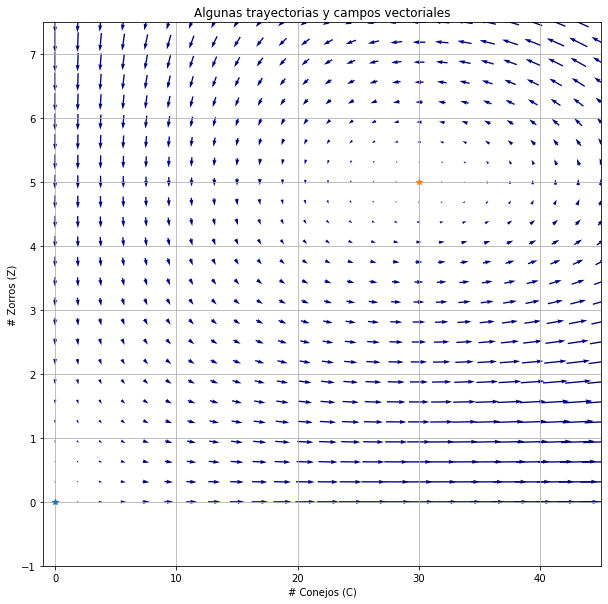

In [30]:
eq = Equation(0.1, 0.02, 0.3, 0.01)
eq.phase_plot()

## Ejercicio B
Reflexioná sobre los significados biológicos de cada uno de los términos y coeficientes α, β, γ y δ de
las ecuaciones, construí y analizá biológicamente el diagrama de fase.

### Análisis

Volviendo a nuestro sistema de ecuaciones:

$$
\dot{C}(t) = \alpha C(t) - \beta C(t) Z(t)
$$
$$
\dot{Z}(t) = - \gamma Z(t) + \delta C(t) Z(t)
$$

Vemos que la tasa de cambio de la cantidad de conejos tiene dos términos:

1. Es proporcional a la cantidad existente de conejos por la constante $\alpha$. Esto quiere decir que, **con un $\alpha$ mayor a cero, los conejos se reproducen si se encuentran solos** (probablemente alcanza con el alimento presente en el ambiente).
    
2. Su crecimiento se encuentra **"amortiguado"** por la cantidad de zorros existentes ($- \beta C Z$). En el caso de ser **$\beta$ positivo, esto quiere decir que, si hay zorros, se los comerán** (dependiendo de la cantidad de zorros que haya, puede que la tasa siga siendo positiva y los conejos puedan incrementar su población).
    
Podemos hacer un análisis parecido para la tasa de cambio de la cantidad de zorros, revisando los dos términos:

1. El crecimiento en aislación es proporcional (negativamente) a la cantidad existente de zorros por la constante $\gamma$. Esto quiere decir que, **con un $\gamma$ mayor a cero, los zorros van disminuyendo su población con el tiempo naturalmente** (si no comen conejo, no les alcanza con el alimento presente en el ambiente).
    
2. Su crecimiento se ve **"incrementado"** por la cantidad de conejos existentes ($\delta C Z$). En el caso de ser $\delta$ positivo, esto quiere decir que, **si hay conejos, los zorros van a poder alimentarse y reproducirse** (esto también dependerá de la relación entre la cantidad de ellos, debe haber suficientes conejos para que todos los zorros puedan alimentarse, si no se verán obligados a pelear por recursos e inevitablemente bajar su población con el tiempo).

### Probemos con algunas curvas

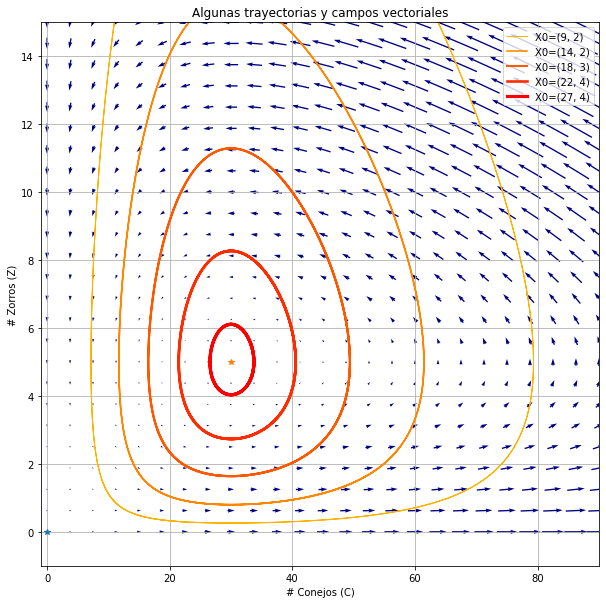

In [31]:
eq.phase_plot(curves=True)


A partir del análisis de los puntos fijos y las curvas podemos ayudarnos a entender cómo evoluciona este sistema y sacar algunas conclusiones biológicas:

- Si el sistema comienza sólo con conejos (recta X > 0), los mismos se reproducirán al infinito.

- Si comenzamos sólo con zorros (recta Z < 0), no tendrán alimento suficiente para reproducirse y tarde o temprano la población desaparecerá.

- Si no tenemos conejos ni zorros (punto fijo (0, 0)), el sistema se encuentra en equilibrio y no ocurre nada.

- Si la cantidad de conejos y zorros se encuentra en nuestro segundo punto fijo, tenemos otro punto de equilibrio en el que ambas especies coexisten y mantienen para siempre su cantidad.

- Cualquier otra combinación en la cantidad de conejos y zorros desembocará en lo que veíamos como curvas estables, es decir que la cantidad de animales irá cambiando en el tiempo, pero nunca se extinguirá ninguna especie y, en el tiempo, las cantidades tendrán un comportamiento sinusoidal.


## Ejercicio C
Encontrá una solución numérica aproximada al problema para el caso particular en que los parámetros toman los siguientes valores del punto a) entre t = 0 y t = 200, para un paso de integración h = 0.05 para las condiciones iniciales C(0) = 40 y Z(0) = 9.

Recordá que esto se denomina problema de valor inicial.

### Usamos Runge-Kutta de 4to orden

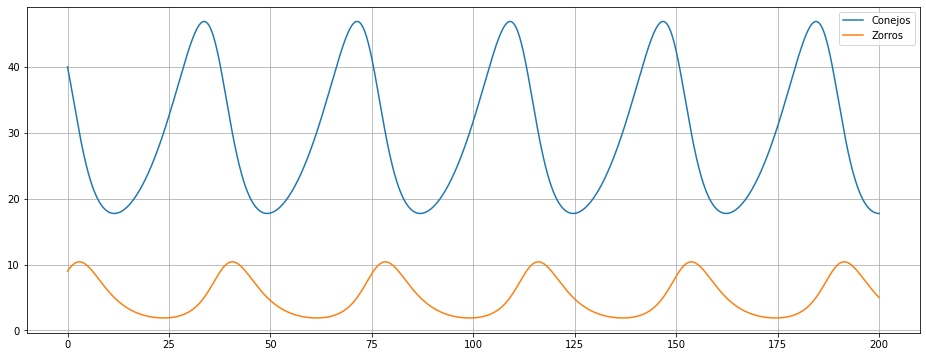

In [55]:
import matplotlib.pyplot as plt
# Parametros
a = 0.1
b = 0.02
c = 0.3
d = 0.01

def V(u,t):
    x, y = u
    return np.array([a*x - b*x*y, -c*y + d*x*y])

def rk4(f, u0, t0, tf , n):
    t = np.linspace(t0, tf, n + 1)
    u = np.array((n + 1) * [u0])
    h = t[1] - t[0]
    for i in range(n):
        k1 = h * f(u[i], t[i])    
        k2 = h * f(u[i] + 0.5 * k1, t[i] + 0.5*h)
        k3 = h * f(u[i] + 0.5 * k2, t[i] + 0.5*h)
        k4 = h * f(u[i] + k3, t[i] + h)
        u[i+1] = u[i] + (k1 + 2*(k2 + k3 ) + k4) / 6
    return u, t

def calc_and_plot(rabbits, foxes):
    u, t = rk4(V, np.array([rabbits, foxes]), 0.0, 200.0, 4000)
    x, y = u.T
    plt.figure(figsize=(16,6))
    plt.plot(t, x, t, y)
    plt.legend(["Conejos", "Zorros"])
    plt.grid('on')
    plt.show()


### Conclusiones

Como vimos que el gráfico de flujo tenía un comportamiento de ciclos alrededor del punto fijo, tenemos que, al resolver nuestro sistema y hacerlo evolucionar en el tiempo, llegamos a poblaciones de conejos y zorros que avanzan de forma periódica en el tiempo.